### Population models

#### Exponential model

If a population is only just starting to grow, we might observe that its growth rate is proportional to its population.

$ \frac{dP}{dt} = rP $

Then we can integrate it to find:

$ \frac{1}{P} dP = r dt $

$ \ln P = rt + C_1 $

$ P = e^{rt + C_1} $

We now have the exponential growth model:

$ P = C_2 e^{rt} $

And this might be a good model at first. But, as a population grows then the growth rate might slow. We introduce the notion of a carrying capacity $ K $

#### Logistic population model

$ \frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) $

And this implies that as $ P \to K $ then $ \frac{dP}{dt} \to 0 $

We can integrate this:

$ \frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) $

$ \frac{1}{P\left(1 - \frac{P}{K}\right)} \frac{dP}{dt} = r $

$ \frac{K}{P\left(K - P\right)} \frac{dP}{dt} = r $

$ \frac{K}{P\left(K - P\right)} dP = r \cdot dt$

Use partial fraction decomposition:

$\frac{1}{K}\left(\frac{1}{P} + \frac{1}{K-P} \right)  dP = r \cdot dt$

$ \frac{1}{P} + \frac{1}{K - P} dP = rK \cdot dt$

$ \ln |P| -\ln(|K - P|) = rKt + C_1 $

$ \ln(|\frac{P}{K - P}|) = rKt + C_1 $

$ \frac{P}{K - P} = e^{rKt + C_1} $

$ \frac{P}{K - P} = C_2e^{rKt} $

To find a particular solution, we should find $ C $

Let $ P_0 $ be the initial point, which means that $ t = 0 $

$ \frac{P_0}{K - P_0} = C_2e^{rK(0)} $

$ C = \frac{P_0}{K - P_0} $

$ \frac{P}{K - P} = \frac{P_0}{K - P_0}e^{rKt} $

$ P(K - P_0) = P_0(K - P)e^{rKt} $

$ PK - P_0P = P_0Ke^{rKt} - PP_0 e^{rKt} $

$ PK - P_0P + PP_0 e^{rKt} = P_0Ke^{rKt} $

$ K - P_0 + P_0 e^{rKt} = \frac{P_0Ke^{rKt}}{P} $

$ \frac{1}{K - P_0 + P_0 e^{rKt}} = \frac{P}{P_0Ke^{rKt}} $

$ P = \frac{P_0Ke^{rKt}}{K - P_0 + P_0 e^{rKt}}$

$ P = \frac{Ke^{rKt}}{\frac{K - P_0}{P_0}+ e^{rKt}}$

$ P = \frac{K}{\frac{K - P_0}{P_0}e^{-rKt} + 1} $


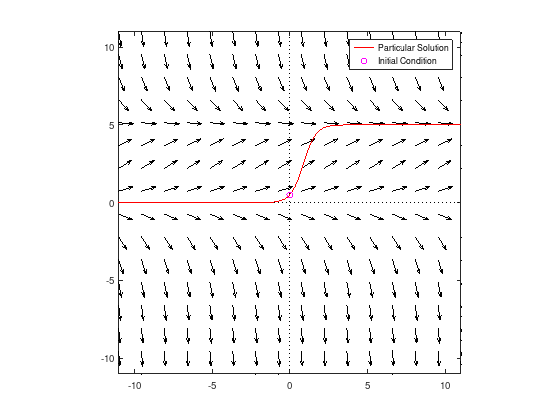

In [2]:
clear

function dP_dt = fdash(t, P)
    r = .5;
    K = 5;
    dP_dt = r.*P.*(1.-(P/K));
end

initial_condition = [0,0.5];

plot_dimensions = [-11 11 -11 11];

function solution = particular_solution(t, P)
    r = .5;
    K = 5;
    P_0 = .5;
    solution = K./((K.-P_0)./P_0 .* exp(-r.*K.*t) + 1);
end
slope_field(@fdash, plot_dimensions, @particular_solution, initial_condition);

### Theta-logistic model

The straight line approximation of the logistic growth model, as a function that shows the model's growth rate, can be modified by adding a $ \theta $, as in the diagram below.

![different theta effect on DE](theta-logistic-model.png)



### Allee effect

To look at the phase plane of the Logistic model, it would seem that a population would grow the quickest the smaller the population is. The assumption would be that fewer animals would mean less competition for resources.

Smaller populations are also at greater risk of extinction.

Sometimes a population will have a critical lower threshold and if this is surpassed then the population might enter negative growth.

Let's revisit the Logistic DE and account for negative growth.

$ \frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) (\text{something}) $

Let:

$ M $ be the critical threshold.

"Something" should be negative when $ P < M $ and positive when $ P > M $.

Then:

"Something" = $ \left( \frac{P}{M} - 1 \right) $

$ \frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right) \left( \frac{P}{M} - 1 \right) $

TODO - find some particular solutions and plot them below

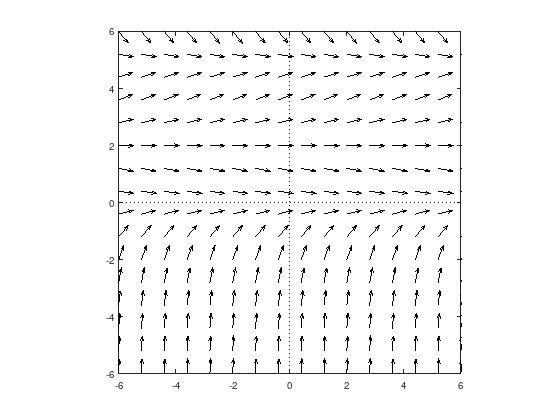

In [15]:
clear

function dP_dt = fdash(t, P)
    r = .5;
    K = 5;
    M = 2;
    dP_dt = r.*P.*(1.-(P./K)).*(P./M.-1);
end

plot_dimensions = [-6 6 -6 6];

slope_field(@fdash, plot_dimensions);